# 5月11日 第6章：機械学習（50〜54）

本章では，Fabio Gasparetti氏が公開しているNews Aggregator Data Setを用い，ニュース記事の見出しを「ビジネス」「科学技術」「エンターテイメント」「健康」のカテゴリに分類するタスク（カテゴリ分類）に取り組む．

## 50. データの入手・整形

News Aggregator Data Setをダウンロードし、以下の要領で学習データ（train.txt），検証データ（valid.txt），評価データ（test.txt）を作成せよ．

1, ダウンロードしたzipファイルを解凍し，readme.txtの説明を読む．

In [ ]:
DATA SHAPE AND STATS: 422937 news pages and divided up into:
        
FORMAT: ID \t TITLE \t URL \t PUBLISHER \t CATEGORY \t STORY \t HOSTNAME \t TIMESTAMP

2, 情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する．

In [5]:
import pandas as pd

In [6]:
# データをロード
column_names = ['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP']
data = pd.read_table('data/NewsAggregatorDataset/newsCorpora.csv', names = column_names, quoting=3, header=None)

In [7]:
# ５行目まで見てみる
data.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [8]:
# readme.txtの数値と合っているか
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422937 entries, 0 to 422936
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ID         422937 non-null  int64 
 1   TITLE      422937 non-null  object
 2   URL        422937 non-null  object
 3   PUBLISHER  422935 non-null  object
 4   CATEGORY   422937 non-null  object
 5   STORY      422937 non-null  object
 6   HOSTNAME   422937 non-null  object
 7   TIMESTAMP  422937 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 25.8+ MB


In [9]:
# 情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出
ex_data = data[data['PUBLISHER'].isin(['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Daily Mail'])]

In [10]:
ex_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13356 entries, 12 to 422837
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13356 non-null  int64 
 1   TITLE      13356 non-null  object
 2   URL        13356 non-null  object
 3   PUBLISHER  13356 non-null  object
 4   CATEGORY   13356 non-null  object
 5   STORY      13356 non-null  object
 6   HOSTNAME   13356 non-null  object
 7   TIMESTAMP  13356 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 939.1+ KB


In [11]:
ex_data.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
12,13,Europe reaches crunch point on banking union,http://in.reuters.com/article/2014/03/10/eu-ba...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,1394470501755
13,14,ECB FOCUS-Stronger euro drowns out ECB's messa...,http://in.reuters.com/article/2014/03/10/ecb-p...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,1394470501948
19,20,"Euro Anxieties Wane as Bunds Top Treasuries, S...",http://www.businessweek.com/news/2014-03-10/ge...,Businessweek,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,www.businessweek.com,1394470503148
20,21,Noyer Says Strong Euro Creates Unwarranted Eco...,http://www.businessweek.com/news/2014-03-10/no...,Businessweek,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,www.businessweek.com,1394470503366
29,30,REFILE-Bad loan triggers key feature in ECB ba...,http://in.reuters.com/article/2014/03/10/euroz...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,1394470505070


3, 抽出された事例をランダムに並び替える．

In [12]:
random_data = ex_data.sample(frac=1, random_state=0)

In [13]:
random_data.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
334746,334747,Bulgaria's third biggest lender says no restri...,http://in.reuters.com/article/2014/06/27/bulga...,Reuters,b,dJLBdQIaAqzVUxMzFcv71jd5V1euM,in.reuters.com,1404149507072
357853,357854,Party tents go up on the eve of Jessica Simpso...,http://www.dailymail.co.uk/video/tvshowbiz/vid...,Daily Mail,e,dwGxjawm4kYU7uMpkgRpycMQo_S7M,www.dailymail.co.uk,1404527471166
38297,38298,"UK shares slide on China growth concerns, geop...",http://www.reuters.com/article/2014/03/24/mark...,Reuters,b,dy4Cp8QXtnAf7GM6kbWPIW1gpw70M,www.reuters.com,1395754740123
274239,274240,"Scott Derrickson To Direct ""Dr. Strange"" - Are...",http://www.contactmusic.com/article/scott-derr...,Contactmusic.com,e,dN7NEV1sHHBk0eMRfbmDKZUlDaRGM,www.contactmusic.com,1401896447281
215372,215373,Obama dedicates National September 11 Memorial...,http://www.dailymail.co.uk/news/article-262936...,Daily Mail,e,dwh1spramOeghdMJWFxXs-sGvWB5M,www.dailymail.co.uk,1400395587302


4, 抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割し，それぞれtrain.txt，valid.txt，test.txtというファイル名で保存する．ファイルには，１行に１事例を書き出すこととし，カテゴリ名と記事見出しのタブ区切り形式とせよ（このファイルは後に問題70で再利用する）．

In [14]:
len(random_data)

13356

In [15]:
# random_dataからカテゴリとタイトルだけ取り出す
df = random_data[['TITLE', 'CATEGORY']]

print(len(df))

13356


In [16]:
df.head()

,TITLE,CATEGORY
334746,Bulgaria's third biggest lender says no restri...,b
357853,Party tents go up on the eve of Jessica Simpso...,e
38297,"UK shares slide on China growth concerns, geop...",b
274239,"Scott Derrickson To Direct ""Dr. Strange"" - Are...",e
215372,Obama dedicates National September 11 Memorial...,e


In [17]:
# データ分割

# 学習データ数 trainNum
trainNum = int(len(df)*0.8)
# 学習データ
train = df[:trainNum]

# 90%
n_Num = int(len(df)*0.9)

# 検証データ
valid = df[trainNum:n_Num]
# 評価データ
test = df[n_Num:]

In [18]:
print(trainNum)
print(n_Num)
print(trainNum+n_Num)

10684
12020
22704


In [19]:
print(len(train))
print(len(valid))
print(len(test))

10684
1336
1336


In [20]:
# ファイルに保存
train.to_csv('train.txt', sep='\t')
valid.to_csv('valid.txt', sep='\t')
test.to_csv('test.txt', sep='\t')

学習データと評価データを作成したら，各カテゴリの事例数を確認せよ．

In [21]:
# 事例数を確認
print("学習データ")
print(train['CATEGORY'].value_counts())
print("検証データ")
print(valid['CATEGORY'].value_counts())
print("評価データ")
print(test['CATEGORY'].value_counts())

学習データ
b    4508
e    4221
t    1226
m     729
Name: CATEGORY, dtype: int64
検証データ
b    558
e    541
t    145
m     92
Name: CATEGORY, dtype: int64
評価データ
b    561
e    532
t    154
m     89
Name: CATEGORY, dtype: int64


## 51. 特徴量抽出

学習データ，検証データ，評価データから特徴量を抽出し，それぞれtrain.feature.txt，valid.feature.txt，test.feature.txtというファイル名で保存せよ． なお，カテゴリ分類に有用そうな特徴量は各自で自由に設計せよ．記事の見出しを単語列に変換したものが最低限のベースラインとなるであろう．

In [22]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# ベクトル化する文字列
sample = np.array(['Apple computer of the apple mark', 'linux computer', 'windows computer'])

# CountVectorizer
vec_count = CountVectorizer()

# ベクトル化
vec_count.fit(sample)
X = vec_count.transform(sample)

print('Vocabulary size: {}'.format(len(vec_count.vocabulary_)))
print('Vocabulary content: {}'.format(vec_count.vocabulary_))

Vocabulary size: 7
Vocabulary content: {'apple': 0, 'computer': 1, 'of': 4, 'the': 5, 'mark': 3, 'linux': 2, 'windows': 6}


In [23]:
pd.DataFrame(X.toarray(), columns=vec_count.get_feature_names())

,apple,computer,linux,mark,of,the,windows
0,2,1,0,1,1,1,0
1,0,1,1,0,0,0,0
2,0,1,0,0,0,0,1


In [24]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer
cv = CountVectorizer()

# ベクトル化
cv_train = cv.fit_transform(train['TITLE'])
cv_valid = cv.transform(valid['TITLE'])
cv_test = cv.transform(test['TITLE'])

# Dataframeの作成
feature_train = pd.DataFrame(cv_train.toarray(), columns=cv.get_feature_names())
feature_valid = pd.DataFrame(cv_valid.toarray(), columns=cv.get_feature_names())
feature_test = pd.DataFrame(cv_test.toarray(), columns=cv.get_feature_names())

In [25]:
# ファイルに保存
feature_train.to_csv('train.feature.txt', sep='\t')
feature_valid.to_csv('valid.feature.txt', sep='\t')
feature_test.to_csv('test.feature.txt', sep='\t')

## 52. 学習

51で構築した学習データを用いて，ロジスティック回帰モデルを学習せよ．

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr = LogisticRegression()
lr.fit(feature_train, train['CATEGORY'])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

↑ 引数max_iterのデフォルト100回で収束しなかった
→ 回数を増やす

In [28]:
lr = LogisticRegression(max_iter=200)
lr.fit(feature_train, train['CATEGORY'])

LogisticRegression(max_iter=200)

## 53. 予測

52で学習したロジスティック回帰モデルを用い，与えられた記事見出しからカテゴリとその予測確率を計算するプログラムを実装せよ．

### 失敗

In [26]:
def predict_title(title):
    
    #title = np.array([title])
    title = [title]
    
    # ベクトル化
    cv_title = cv.fit_transform(title)
    
    # Dataframeの作成
    f_title = pd.DataFrame(cv_title.toarray(), columns=cv.get_feature_names())
    
    # Predict class labels for samples in X.
    preds = lr.predict(f_title)
    
    # Returns the probability of the sample for each class in the model, where classes are ordered as they are in self.classes_.
    probs = lr.predict_proba(f_title)
    prob = probs.max(axis=1)
    
    return preds, prob

In [96]:
text = train.iloc[0]['TITLE']
print(text)
print(np.array([text]).shape)

p = predict_title(text)

Bulgaria's third biggest lender says no restrictions on operations
(1,)


ValueError: X has 9 features per sample; expecting 12753

In [79]:
text = train.iloc[0]['TITLE']
print(text)

# ベクトル化する文字列
sample = np.array([text])

# ベクトル化
vec_count.fit(sample)
X = vec_count.transform(sample)

print('Vocabulary size: {}'.format(len(vec_count.vocabulary_)))
print('Vocabulary content: {}'.format(vec_count.vocabulary_))

Bulgaria's third biggest lender says no restrictions on operations
Vocabulary size: 9
Vocabulary content: {'bulgaria': 1, 'third': 8, 'biggest': 0, 'lender': 2, 'says': 7, 'no': 3, 'restrictions': 6, 'on': 4, 'operations': 5}


In [80]:
pd.DataFrame(X.toarray(), columns=vec_count.get_feature_names())

,biggest,bulgaria,lender,no,on,operations,restrictions,says,third
0,1,1,1,1,1,1,1,1,1


In [66]:
print(feature_train.shape)
print(feature_train.head())

(10684, 12753)
   00  07  08  09  0ff  10  100  1000  10000  100000  ...  zombie  zombies  \
0   0   0   0   0    0   0    0     0      0       0  ...       0        0   
1   0   0   0   0    0   0    0     0      0       0  ...       0        0   
2   0   0   0   0    0   0    0     0      0       0  ...       0        0   
3   0   0   0   0    0   0    0     0      0       0  ...       0        0   
4   0   0   0   0    0   0    0     0      0       0  ...       0        0   

   zone  zooey  zoosk  zuckerberg  zynga  zâ  œlousyâ  œwaist  
0     0      0      0           0      0   0        0       0  
1     0      0      0           0      0   0        0       0  
2     0      0      0           0      0   0        0       0  
3     0      0      0           0      0   0        0       0  
4     0      0      0           0      0   0        0       0  

[5 rows x 12753 columns]


### ここから

In [29]:
def predict(x):
    # Predict class labels for samples in X.
    preds = lr.predict(x)
    
    # Returns the probability of the sample for each class in the model, where classes are ordered as they are in self.classes_.
    probs = lr.predict_proba(x)
    prob = probs.max(axis=1)
    
    return preds, prob

In [30]:
preds, prob = predict(feature_train)

pd.DataFrame([[y, p] for y, p in zip(preds, prob)], columns = ['カテゴリ', '予測確率'])
#print(preds)
#print(probs)

,カテゴリ,予測確率
0,b,0.937278
1,e,0.987322
2,b,0.999373
3,e,0.931490
4,e,0.846639
...,...,...
10679,e,0.941925
10680,e,0.967567
10681,b,0.946685
10682,e,0.948272


## 54. 正解率の計測

52で学習したロジスティック回帰モデルの正解率を，学習データおよび評価データ上で計測せよ．

In [31]:
def accuracy(xs, ts):
    # 予測カテゴリー
    ys = lr.predict(xs)
    
    return (ys == ts).mean()

In [32]:
#train_preds, train_prob = predict(feature_train)

print('学習データ')
print(accuracy(feature_train, train['CATEGORY']))

学習データ
0.9965368775739424


In [33]:
print('評価データ')
print(accuracy(feature_test, test['CATEGORY']))

評価データ
0.907185628742515


# 5月18日 第6章：機械学習（55〜59）

## 55. 混同行列の作成

52で学習したロジスティック回帰モデルの混同行列（confusion matrix）を，学習データおよび評価データ上で作成せよ．

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
# 学習データ 
train_pred, train_probs = predict(feature_train)

train_confusion = confusion_matrix(train_pred, train['CATEGORY'])

In [36]:
pd.DataFrame(train_confusion, columns=["Pred b", "Pred e", "Pred t", "Pred m"], index=["b", "e", "t", "m"])

,Pred b,Pred e,Pred t,Pred m
b,4499,6,2,15
e,2,4214,2,2
t,0,0,725,0
m,7,1,0,1209


In [37]:
# 評価データ
test_pred, test_probs = predict(feature_test)

test_confusion = confusion_matrix(test_pred, test['CATEGORY'])

In [38]:
pd.DataFrame(test_confusion, columns=["Pred b", "Pred e", "Pred t", "Pred m"], index=["b", "e", "t", "m"])

,Pred b,Pred e,Pred t,Pred m
b,541,21,8,29
e,10,505,18,17
t,2,3,59,1
m,8,3,4,107


## 56. 適合率，再現率，F1スコアの計測

52で学習したロジスティック回帰モデルの適合率，再現率，F1スコアを，評価データ上で計測せよ．カテゴリごとに適合率，再現率，F1スコアを求め，カテゴリごとの性能をマイクロ平均（micro-average）とマクロ平均（macro-average）で統合せよ．

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score

引数average
None:カテゴリ毎にリストで返却
micro:マイクロ平均
macro:マクロ平均

カテゴリごとに適合率，再現率，F1スコアを求める。

In [40]:
# 適合率
test_precision_score = precision_score(test_pred, test['CATEGORY'], average=None)
pd.DataFrame(test_precision_score, columns=["適合率"], index=["b", "e", "t", "m"])
#print("test_precision_score : ", test_precision_score)

,適合率
b,0.964349
e,0.949248
t,0.662921
m,0.694805


In [41]:
# 再現率
test_recall_score = recall_score(test_pred, test['CATEGORY'], average=None)
#print("test_recall_score : ", test_recall_score)
pd.DataFrame(test_recall_score, columns=["再現率"], index=["b", "e", "t", "m"])

,再現率
b,0.903172
e,0.918182
t,0.907692
m,0.877049


In [42]:
# F1スコア
test_f1_score = f1_score(test_pred, test['CATEGORY'], average=None)
#print("test_f1_score : ", test_f1_score)
pd.DataFrame(test_f1_score, columns=["F1スコア"], index=["b", "e", "t", "m"])

,F1スコア
b,0.932759
e,0.933457
t,0.766234
m,0.775362


In [43]:
pd.DataFrame(np.array([test_precision_score, test_recall_score, test_f1_score]), index=["適合率", "再現率", "F1スコア"], columns=["b", "e", "t", "m"])

,b,e,t,m
適合率,0.964349,0.949248,0.662921,0.694805
再現率,0.903172,0.918182,0.907692,0.877049
F1スコア,0.932759,0.933457,0.766234,0.775362


マイクロ平均を求める。

In [44]:
# 適合率
test_precision_score_micro = precision_score(test_pred, test['CATEGORY'], average='micro')
print('test_f1_score_micro:',test_precision_score_micro)

# 再現率
test_recall_score_micro = recall_score(test_pred, test['CATEGORY'], average='micro')
print('test_f1_score_micro:',test_recall_score_micro)

# F1スコア
test_f1_score_micro = f1_score(test_pred, test['CATEGORY'], average='micro')
print('test_f1_score_micro:',test_f1_score_micro)

test_f1_score_micro: 0.907185628742515
test_f1_score_micro: 0.907185628742515
test_f1_score_micro: 0.907185628742515


マクロ平均を求める。

In [45]:
# 適合率
test_precision_score_macro = precision_score(test_pred, test['CATEGORY'], average='macro')
print('test_precision_score_macro:',test_precision_score_macro)

# 再現率
test_recall_score_macro = recall_score(test_pred, test['CATEGORY'], average='macro')
print('test_recall_score_macro:',test_recall_score_macro)

# F1スコア
test_f1_score_macro = f1_score(test_pred, test['CATEGORY'], average='macro')
print('test_f1_score_macro:',test_f1_score_macro)

test_precision_score_macro: 0.8178310098836589
test_recall_score_macro: 0.9015238148643552
test_f1_score_macro: 0.8519528169215919


カテゴリごとの性能をマイクロ平均（micro-average）とマクロ平均（macro-average）で統合せよ???

## 57. 特徴量の重みの確認

52で学習したロジスティック回帰モデルの中で，重みの高い特徴量トップ10と，重みの低い特徴量トップ10を確認せよ．

In [46]:
names = np.array(cv.get_feature_names())
print(names.shape)
print(names

SyntaxError: unexpected EOF while parsing (<ipython-input-46-de185b359bc9>, line 3)

In [47]:
names = np.array(cv.get_feature_names())

for c, coef in zip(lr.classes_, lr.coef_): # c:カテゴリ、coef:重み
    idx = np.argsort(coef)[::-1] #　大きい順にソートし、インデックスを返す
    
    print ("カテゴリ : ", c)
    #print ("重みの高い特徴量トップ10\n", names[idx][:10]) # 重みの高い特徴量トップ10
    #print ("重みの低い特徴量トップ10\n", names[idx][-10:][::-1]) # 重みの低い特徴量トップ10
    
    best10 = pd.DataFrame(names[idx][:10], columns=['重要度上位']).T
    worst10 = pd.DataFrame(names[idx][-10:][::-1], columns=['重要度下位']).T
    display(pd.concat([best10, worst10], axis=0))

カテゴリ :  b


,0,1,2,3,4,5,6,7,8,9
重要度上位,bank,ecb,fed,ukraine,obamacare,yellen,oil,dollar,argentina,china
重要度下位,activision,aereo,ebola,twitch,nintendo,heartbleed,her,she,virus,gay


カテゴリ :  e


,0,1,2,3,4,5,6,7,8,9
重要度上位,kardashian,chris,transformers,miley,paul,cyrus,movie,jay,thrones,trailer
重要度下位,google,microsoft,gm,facebook,obamacare,risk,ceo,data,china,prices


カテゴリ :  m


,0,1,2,3,4,5,6,7,8,9
重要度上位,ebola,fda,cancer,mers,study,cigarettes,cdc,doctors,drug,cases
重要度下位,gm,facebook,apple,twitter,climate,google,jpmorgan,explain,netflix,game


カテゴリ :  t


,0,1,2,3,4,5,6,7,8,9
重要度上位,facebook,google,climate,apple,microsoft,heartbleed,tesla,activision,nasa,fcc
重要度下位,stocks,percent,move,health,american,shares,drug,close,valued,should


パラメータ（重み）を得る

coef_ndarray of shape (1, n_features) or (n_classes, n_features)
Coefficient of the features in the decision function.

coef_ is of shape (1, n_features) when the given problem is binary. In particular, when multi_class='multinomial', coef_ corresponds to outcome 1 (True) and -coef_ corresponds to outcome 0 (False).

In [48]:
lr.coef_

array([[ 0.05275788,  0.02514223,  0.00431695, ..., -0.00048601,
        -0.04546792, -0.00103919],
       [-0.03369097, -0.01577539, -0.00208704, ...,  0.0043715 ,
         0.09284354,  0.00563695],
       [-0.00942501, -0.00494468, -0.00151254, ..., -0.00173109,
        -0.02995015, -0.00133805],
       [-0.0096419 , -0.00442217, -0.00071736, ..., -0.00215441,
        -0.01742547, -0.00325972]])

In [49]:
lr.coef_.shape

(4, 12753)

## 58. 正則化パラメータの変更

ロジスティック回帰モデルを学習するとき，正則化パラメータを調整することで，学習時の過学習（overfitting）の度合いを制御できる．異なる正則化パラメータでロジスティック回帰モデルを学習し，学習データ，検証データ，および評価データ上の正解率を求めよ．実験の結果は，正則化パラメータを横軸，正解率を縦軸としたグラフにまとめよ．

LogisticRegressionは正則化パラメータCを指定することができます。この値が小さいほど、強い正則化がかかります。

C : float, default=1.0
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

In [50]:
def accuracy2(model, xs, ts):
    # 予測カテゴリー
    ys = model.predict(xs)
    
    return (ys == ts).mean()

In [51]:
result = []

# 正則化パラメータ
C = np.logspace(-5, 4, 10, base=10) # 等比数列

for c in C:
    # ロジスティック回帰モデルを学習
    lr = LogisticRegression(random_state=0, max_iter=5000, C=c)
    lr.fit(feature_train, train['CATEGORY'])

    # 正解率の計算
    #accuracy(feature_train, train['CATEGORY'])
    
    train_accuracy = accuracy2(lr, feature_train, train['CATEGORY'])
    valid_accuracy = accuracy2(lr, feature_valid, valid['CATEGORY'])
    test_accuracy = accuracy2(lr, feature_test, test['CATEGORY'])
    
    #resultに格納
    result.append([c, train_accuracy, valid_accuracy, test_accuracy])

result = np.array(result).T
result

array([[1.00000000e-05, 1.00000000e-04, 1.00000000e-03, 1.00000000e-02,
        1.00000000e-01, 1.00000000e+00, 1.00000000e+01, 1.00000000e+02,
        1.00000000e+03, 1.00000000e+04],
       [4.21939349e-01, 5.47079745e-01, 7.20891052e-01, 7.84537626e-01,
        9.28678398e-01, 9.96536878e-01, 9.99625608e-01, 9.99625608e-01,
        9.99625608e-01, 9.99625608e-01],
       [4.17664671e-01, 5.40419162e-01, 7.18562874e-01, 7.77694611e-01,
        8.83233533e-01, 9.13173653e-01, 9.11676647e-01, 9.14670659e-01,
        9.10179641e-01, 9.10928144e-01],
       [4.19910180e-01, 5.47904192e-01, 7.15568862e-01, 7.76946108e-01,
        8.71257485e-01, 9.07185629e-01, 9.13173653e-01, 9.14670659e-01,
        9.14670659e-01, 9.13922156e-01]])

In [53]:
import matplotlib.pyplot as plt

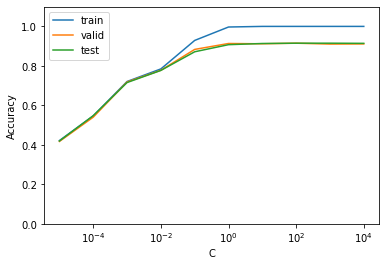

In [55]:
#可視化
plt.plot(result[0], result[1], label='train')
plt.plot(result[0], result[2], label='valid')
plt.plot(result[0], result[3], label='test')
plt.ylim(0, 1.1)
plt.ylabel('Accuracy')
plt.xscale('log')
plt.xlabel('C')
plt.legend()
plt.show()

## 59. ハイパーパラメータの探索

学習アルゴリズムや学習パラメータを変えながら，カテゴリ分類モデルを学習せよ．検証データ上の正解率が最も高くなる学習アルゴリズム・パラメータを求めよ．また，その学習アルゴリズム・パラメータを用いたときの評価データ上の正解率を求めよ．

### 学習アルゴリズムを変えてみる

#### ナイーブベイズ

In [52]:
from sklearn.naive_bayes import MultinomialNB

In [56]:
nb = MultinomialNB()
nb.fit(feature_train, train['CATEGORY'])

MultinomialNB()

In [57]:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB()

In [58]:
accuracy2(nb, feature_train, train['CATEGORY'])

0.9568513665293897

In [59]:
accuracy2(nb, feature_test, test['CATEGORY'])

0.9004491017964071

#### 線形サポートベクトルマシン

In [60]:
from sklearn.svm import LinearSVC

In [62]:
svc = LinearSVC(C=0.1)
svc.fit(feature_test, test['CATEGORY'])

LinearSVC(C=0.1)

In [63]:
LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

LinearSVC(C=0.1)

In [64]:
accuracy2(svc, feature_train, train['CATEGORY'])

0.827218270310745

In [65]:
accuracy2(svc, feature_test, test['CATEGORY'])

0.9985029940119761

logistic regressionでは

In [32]:
#train_preds, train_prob = predict(feature_train)

print('学習データ')
print(accuracy(feature_train, train['CATEGORY']))

学習データ
0.9965368775739424


In [33]:
print('評価データ')
print(accuracy(feature_test, test['CATEGORY']))

評価データ
0.907185628742515
